# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with estimating probabilities and using Bayes Theorem within a Jupyter notebook.  The questions coloured green are important practice for CA.

Before attempting these examples, please ensure you have read through [Chapter 3 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter3/Chapter3.ipynb) and have completed the Learning Central **Chapter 3 quiz**. 

These are good practice for CA 1 Questions 2 and 3.

***

# Probabilities

## <font color=#30a64d>Question</font>

You flip a coin 5 times. Use an appropriate probability function to estimate the probability that heads will **not** occur 3 times.  

### Answer

In [1]:
import math
import numpy as np
import scipy as sc

In [2]:
def Binom_Prob(N_successes, N_trials, Prob_success):
    binom_coeff = math.factorial(N_trials)/(math.factorial(N_successes)*math.factorial(abs(N_trials - N_successes)))
    return binom_coeff*(Prob_success**N_successes) * (1 - Prob_success)**(N_trials-N_successes)

N_heads = 3
Trials = 5
Prob_heads = 0.5

prob_3h = Binom_Prob(N_heads, Trials, Prob_heads)

print("Probability of not getting 3 heads when flipping a coin 5 times = {:.2f}.".format(1-prob_3h))

Probability of not getting 3 heads when flipping a coin 5 times = 0.69.


## <font color=#30a64d>Question</font>

The probability that a student is accepted to a prestigious university is 0.3. If 5 students from the same school apply, what is the probability that at most 2 are accepted?

### Answer

In [3]:
prob_accept = 0.3
N_application = 5
N_successful = [0,1,2]
prob_sum = 0

for i in range(len(N_successful)):
    prob_sum += Binom_Prob(N_successful[i], N_application, prob_accept)

print("Probability of 2/5 students getting accepted = {:.2f}.".format(prob_sum))

Probability of 2/5 students getting accepted = 0.84.


***

# Probability Distributions

## <font color=#30a64d>Question </fomt>

What does the binomial distribution look like if the probability of success in $N=17$ trials is $\theta = 0.7$?  

### Answer

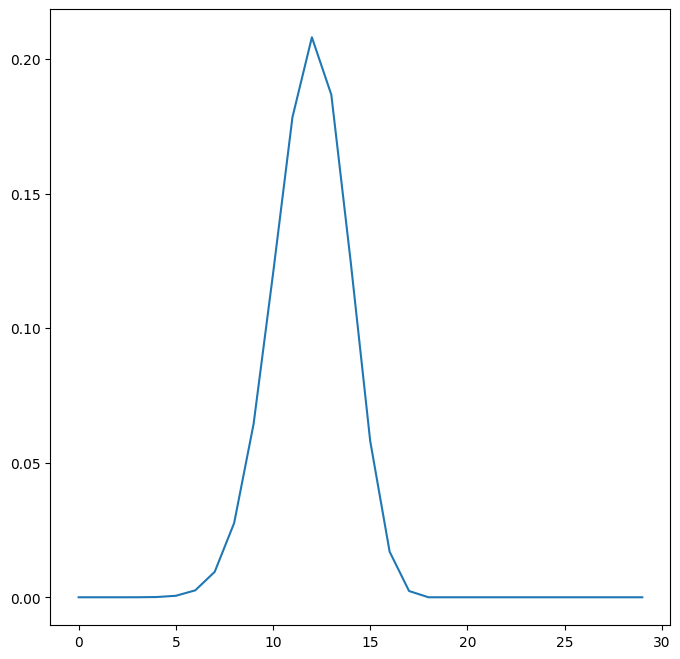

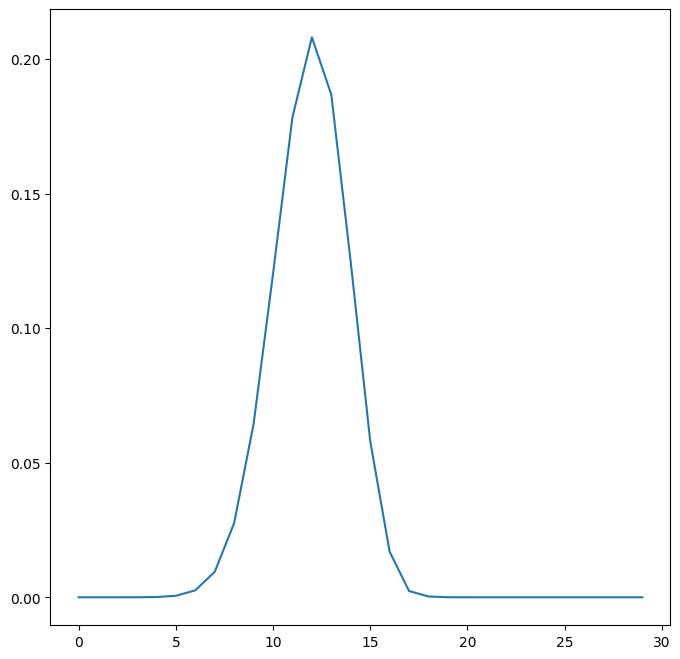

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import binom


nu1 = np.arange(0,30)
nu2 = np.arange(0,17)
n_trials = 17
prob_theta = 0.7

data = np.zeros(len(nu1))
for i in range(len(nu1)):
    data[i] = Binom_Prob(nu1[i], n_trials, prob_theta)

plt.figure(figsize=(8,8))
plt.plot(nu1,binom.pmf(nu1, n_trials, prob_theta))
plt.show()

plt.figure(figsize=(8,8))
plt.plot(nu1,data)
plt.show()

## <font color=#30a64d> Question </font>

Plot a normal distribution in python with mean = 8.0 and standard deviation = 2.0 over an x range `[0,16]`. Do this both by writing your own function and by using in-built Python routines.  

Plot the CDF of the normal distribution using in-built python routines. Estimate the median.

### Answer

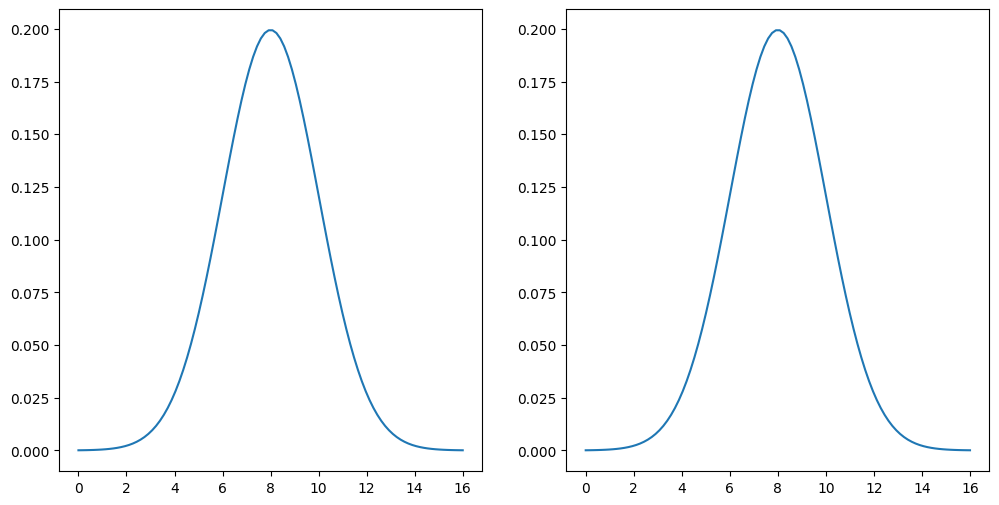

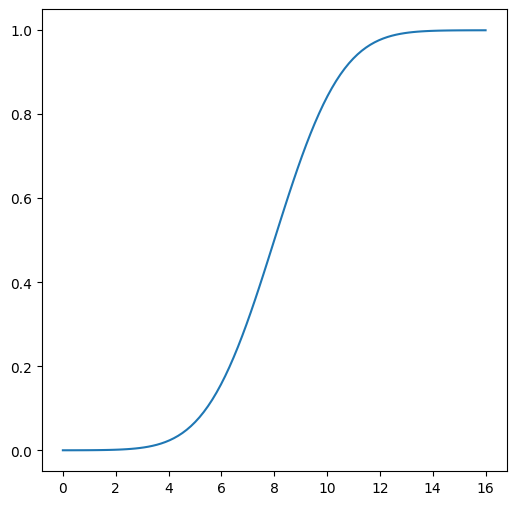

In [5]:
from scipy.stats import norm

def Gaussian(data, centre, sigma):
    prefactor = 1 / (np.sqrt(2*np.pi) * sigma)
    exp_term = ((data - centre)**2)/ (2*sigma**2)
    return prefactor*np.exp(-exp_term)

mean = 8.0
sig = 2.0
x = np.linspace(0,16,100)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,norm.pdf(x, mean, sig))
plt.subplot(1,2,2)
plt.plot(x,Gaussian(x, mean, sig))
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x,norm.cdf(x, mean, sig))
plt.show()


## Question

Let $X$ be a discrete random variable with range $X={1,2,3,...}$. Suppose the probability mass function (PMF) of $X$ is given by

$P_X(k) = \dfrac{1}{2^k}$ for $k={1,2,3,...}$
 
1. Find $P(2<X\le 5)$.
2. Plot the CDF of $X$, $F_X(x)$ where
    $F_X(x) = \dfrac{2^k-1}{2^k}$

### Answer

Probability of X being greater than 2 and less than or equal to 5 = 0.22.


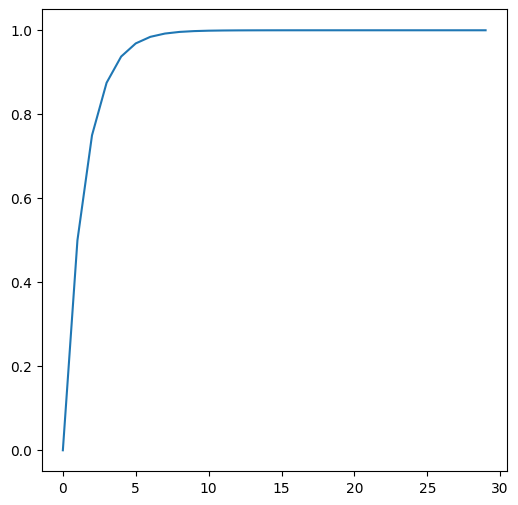

In [6]:
# 1
def Pxk(k):
    return 1/2**k

krange = [3,4,5]
P2_5 = 0
for a in krange:
    P2_5 += Pxk(a)

print("Probability of X being greater than 2 and less than or equal to 5 = {:.2f}.".format(P2_5))

# 2
def Fxk(k):
    return (2**k -1)/2**k

Krange = np.arange(0,30)
plt.figure(figsize=(6,6))
plt.plot(Krange, Fxk(Krange))
plt.show()

***

# Best Estimates

## Question 

Astronomers take an image of the galaxy M42 with a telescope to measure its brightness. But they find that the image has background light across the whole picture (we call this a positive background level) which affects the measured brightness of the galaxy. They want to subtract this level off the image.   They don't know whether the mean background value in the image or the median background value is a better estimate of the background. 

Take the image (available [here](https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter3/galaxym42.fits.fz), you will need to upload it to google colab) and plot a histogram of the brightness measured across the image. Overplot the mean and median values and decide which one provides the best measurement of the nuisance background light.<br><br>

Tip: import the following `import matplotlib.pyplot as plt` and `from astropy.io import fits` and read in the image file of the galaxy using the following commands:

`image_data = fits.getdata('galaxym42.fits.fz')` 

`histogram = plt.hist(image_data.flatten(),1000,histtype='bar')`

### Answer

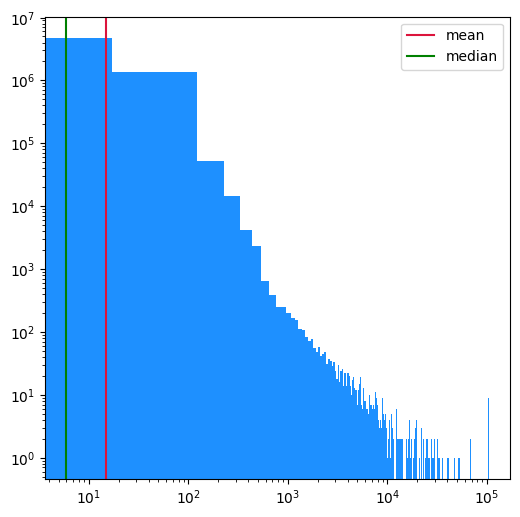

The median appears to be the best choice here as the mean is skewed to the right by the higher data values.


In [18]:
from astropy.io import fits

image_data = fits.getdata('galaxym42.fits.fz')

mean = np.mean(image_data)
median = np.median(image_data)

plt.figure(figsize=(6,6))
histogram = plt.hist(image_data.flatten(),1000,histtype='bar', color='dodgerblue')
plt.axvline(mean, color='crimson', label='mean')
plt.axvline(median, color='green', label='median')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

print('The median appears to be the best choice here as the mean is skewed to the right by the higher data values.')